In [10]:
import os
import argparse
import json
import xml.etree.ElementTree as ET

import re
import cv2
import glob

In [2]:
import matplotlib.pyplot as plt

In [38]:
labels = '''person,bird,cat,cow,dog,horse,sheep,aeroplane,bicycle,boat,bus,car,motorbike,train,bottle,chair,diningtable,pottedplant,sofa,tvmonitor'''

labels = labels.split(',')

labels_maps = {}

for i in range(len(labels)):
    labels_maps[labels[i]] = i

In [39]:
labels_maps

{'person': 0,
 'bird': 1,
 'cat': 2,
 'cow': 3,
 'dog': 4,
 'horse': 5,
 'sheep': 6,
 'aeroplane': 7,
 'bicycle': 8,
 'boat': 9,
 'bus': 10,
 'car': 11,
 'motorbike': 12,
 'train': 13,
 'bottle': 14,
 'chair': 15,
 'diningtable': 16,
 'pottedplant': 17,
 'sofa': 18,
 'tvmonitor': 19}

In [40]:
annotations = glob.glob('/home/usman/workspace/VOC2012/VOC2012/Annotations/*.xml')

annotations_title = [a.split('/')[-1].replace('.xml', '') for a in annotations]

annotations_path = '/home/usman/workspace/VOC2012/VOC2012/Annotations/'
images_path = '/home/usman/workspace/VOC2012/VOC2012/JPEGImages/'

In [41]:
label_text_dest = '/home/usman/workspace/VOC2012/VOC2012/Annotations_text/'

In [49]:
for anno in annotations_title:
    image_path = os.path.join(images_path, anno + '.jpg')
    annotation_path = os.path.join(annotations_path, anno + '.xml')
    
    assert os.path.exists(image_path), 'image: {0} does not exist'.format(image_path)
    
    ann_tree = ET.parse(annotation_path)
    ann_root = ann_tree.getroot()
    
    boxes_in_bounds = []
    
    for obj in ann_root.findall('object'):

        label = obj.findtext('name')
        assert label in labels_maps, "{0} doesn't exist in label map, image: {1}".format(label, image_path)
        bndbox = obj.find('bndbox')
        xmin = int(float(bndbox.findtext('xmin'))) - 1
        ymin = int(float(bndbox.findtext('ymin'))) - 1
        xmax = int(float(bndbox.findtext('xmax')))
        ymax = int(float(bndbox.findtext('ymax')))
        boxes_in_bounds.append( [label, labels_maps[label], xmin, ymin, xmax, ymax] )
        
    label_dest = os.path.join(label_text_dest, '{0}.txt'.format(anno))

    with open(label_dest, 'w') as f:
        for line in boxes_in_bounds:
            s = ','.join([str(l) for l in line])
            f.write(f"{s}\n")
    

In [50]:
annotation_path = '/home/usman/workspace/VOC2012/VOC2012/Annotations/2010_001499.xml'

In [51]:
def get_image_info(annotation_root, extract_num_from_imgid=True):
    path = annotation_root.findtext('path')
    if path is None:
        filename = annotation_root.findtext('filename')
    else:
        filename = os.path.basename(path)
    img_name = os.path.basename(filename)
    img_id = os.path.splitext(img_name)[0]
    if extract_num_from_imgid and isinstance(img_id, str):
        img_id = int(re.findall(r'\d+', img_id)[0])

    size = annotation_root.find('size')
    width = int(size.findtext('width'))
    height = int(size.findtext('height'))

    image_info = {
        'file_name': filename,
        'height': height,
        'width': width,
        'id': img_id
    }
    return image_info

ann_tree = ET.parse(annotation_path)
ann_root = ann_tree.getroot()

for obj in ann_root.findall('object'):
    print(obj)

    label = obj.findtext('name')
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.findtext('xmin')) - 1
    ymin = int(bndbox.findtext('ymin')) - 1
    xmax = int(bndbox.findtext('xmax'))
    ymax = int(bndbox.findtext('ymax'))

<Element 'object' at 0x7f38987077c0>


In [52]:
path = '/home/usman/workspace/VOC2012/voc2012/VOC2012/JPEGImages/2010_001499.jpg'

image = cv2.imread(path)

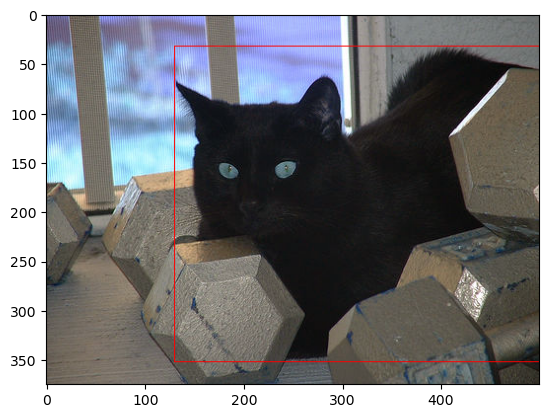

In [53]:
for obj in ann_root.findall('object'):

    label = obj.findtext('name')
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.findtext('xmin')) - 1
    ymin = int(bndbox.findtext('ymin')) - 1
    xmax = int(bndbox.findtext('xmax'))
    ymax = int(bndbox.findtext('ymax'))
    
    image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=1)
    
plt.imshow(image)